Vectores

Definidos de una forma abstracta, los vectores son objetos que se pueden
sumar para formar nuevos vectores y se pueden multiplicar por escalares (es
decir, números), también para formar nuevos vectores.
De una forma más concreta (para nosotros), digamos que los vectores son
puntos de un espacio de dimensión finita. Aunque no se nos suele ocurrir
pensar en los datos como vectores, a menudo son una forma útil de
representar datos numéricos.

Por ejemplo, si tenemos las alturas, pesos y edades de un gran número de
personas, podemos tratar los datos como vectores tridimensionales [height,
weight, age]. Si tuviéramos una clase con cuatro exámenes, podríamos
tratar las notas de los alumnos como vectores de cuatro dimensiones [exam1,
exam2, exam3, exam4].

El enfoque más sencillo para aprender esto desde cero es representar los
vectores como una lista de números. Una lista de tres números corresponde a
un vector en un espacio tridimensional y viceversa.

Realizaremos esto con un alias de tipo que dice que un Vector es solo una
list de valores de tipo float:

In [ ]:
from typing import List

In [ ]:

Vector = List[float]

height_weight_age = [70,  # inches,
                     170, # pounds,
                     40 ] # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62 ]  # exam4


También querremos realizar aritmética con los vectores. Como las list de
Python no son vectores (y por lo tanto no dan facilidades para la aritmética
con vectores), tendremos que crear nosotros mismos estas herramientas de
aritmética. Así que vamos allá.

Para empezar, muy a menudo necesitaremos sumar dos vectores. Los
vectores se suman componente a componente, lo que significa que, si dos
vectores v y w tienen la misma longitud, su suma es sencillamente el vector
cuyo primer elemento es v[0] + w[0], cuyo segundo elemento es v[1] +
w[1], y así sucesivamente (si no tienen la misma longitud, entonces no se
pueden sumar). 

Por ejemplo, sumar los vectores [1, 2] y [2, 1] da como
resultado [1 + 2, 2 + 1] o [3,3], como muestra la figura 4.1.
Podemos implementar esto fácilmente comprimiendo los vectores con zip
y utilizando una comprensión de lista para sumar los elementos
correspondientes:

In [2]:

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]


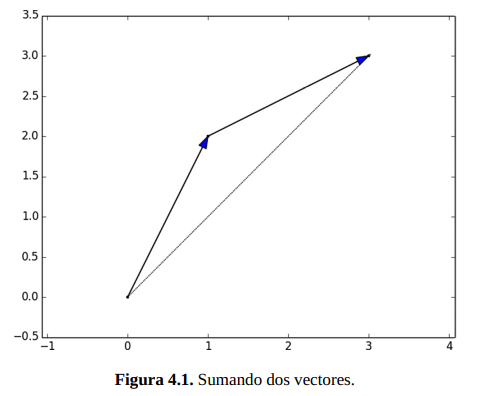

De forma similar, para restar dos vectores simplemente restamos los
elementos correspondientes:

In [ ]:

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]


También querremos en ocasiones sumar una lista de vectores por
componentes (es decir, crear un nuevo vector cuyo primer elemento es la
suma de todos los primeros elementos y cuyo segundo elemento es la suma
de todos los segundos elementos, y así sucesivamente):

In [ ]:

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]


También tendremos que ser capaces de multiplicar un vector por un
escalar, cosa que hacemos sencillamente multiplicando cada elemento del vector por dicho número:

In [ ]:

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]


Esto nos permite calcular la media por componentes de una lista de
vectores (del mismo tamaño):

In [ ]:

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    print(n,1/n)
    return scalar_multiply(1/n, vector_sum(vectors)) #  vector_sum([9,12])

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]


3 0.3333333333333333


NameError: name 'scalar_multiply' is not defined

Una herramienta menos obvia es el producto punto. El producto punto de
dos vectores es la suma de los productos de sus componentes:

In [ ]:

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6


Si w tiene magnitud 1, el producto punto mide hasta dónde se extiende el
vector v en la dirección w. Por ejemplo, si w = [1, 0], entonces dot(v, w) es
el primer componente de v. Otra forma de decir esto es que es la longitud del
vector que se obtendría si se proyectara v en w (véase la figura 4.2).

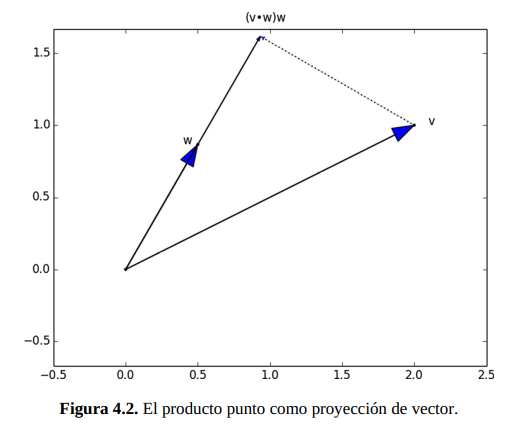

Utilizando esto, es fácil calcular la suma de cuadrados de un vector:

In [ ]:

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3


Que podemos utilizar para calcular su magnitud (o longitud):

In [ ]:

import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

Ahora tenemos todas las piezas necesarias para calcular la distancia entre
dos vectores, definida como:

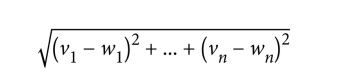

In [ ]:

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))


Quizá esto quede más claro si lo escribimos como (el equivalente):

In [ ]:
def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

Nota: Utilizar listas como vectores es excelente de cara a la galería, pero
terrible para el rendimiento.
En código de producción, nos interesará más utilizar la librería NumPy, que
incluye una clase de objetos array de alto rendimiento con todo tipo de
operaciones aritméticas incluidas.